In [222]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import json
%matplotlib inline
from geopy import distance


In [223]:
locations = open('data.json')
data = json.load(locations)
raw_point_coords ={}
for i in data['features']:
    raw_point_coords[i['properties']['point-id']] = tuple(i['geometry']['coordinates'])

coordinate_dict = {}
coordinate_dict[0] = (12.922963500022886, 52.42706852497485)
for x in sorted(raw_point_coords.items(),key = lambda x :x[0]):
    coordinate_dict[x[0]]=x[1]

In [224]:
df = pd.DataFrame(coordinate_dict,index=['longitude','latitude']).transpose()
df

,longitude,latitude
0,12.922964,52.427069
1,12.924417,52.426643
2,12.924624,52.426676
3,12.924825,52.426731
4,12.924342,52.427059
5,12.924109,52.427000
6,12.924463,52.426764
7,12.924482,52.426911
8,12.924538,52.427088
9,12.922964,52.426666


In [225]:
BBox=((df.longitude.min(), df.longitude.max(),
        df.latitude.min(), df.latitude.max() ))
BBox

(12.922963500022886, 12.924824953079224, 52.42556852497485, 52.42708796038019)

In [226]:
ruh_m = plt.imread('map.png')

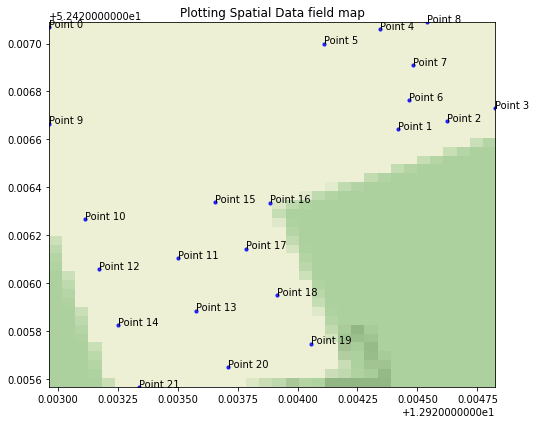

In [227]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.8, c='b', s=10)
ax.set_title('Plotting Spatial Data field map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
for point in df.index:
    ax.annotate(f'Point {point}', (df['longitude'][point],df['latitude'][point]))

In [203]:
distance_dict={}
for current_point in range(0,len(coordinate_dict.items())):
    distance_dict[current_point] = {}
    for y in range(0,len(coordinate_dict.items())):
        if y!= current_point:
            distance_dict[current_point][y] = distance.distance(coordinate_dict[current_point],coordinate_dict[y]).km

In [204]:
distance_df = pd.DataFrame(distance_dict)
distance_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
1,0.167324,NaN,0.023122,0.046110,0.045840,0.051590,0.014069,0.029966,0.050088,0.160848,...,0.151564,0.124013,0.156398,0.090613,0.067782,0.088458,0.093534,0.104913,0.133205,0.166814
2,0.188557,0.023122,NaN,0.023059,0.051919,0.066939,0.020220,0.030009,0.045723,0.183680,...,0.173919,0.144019,0.177510,0.113300,0.089798,0.109285,0.111200,0.118522,0.150409,0.186120
3,0.209156,0.046110,0.023059,NaN,0.064132,0.084405,0.040216,0.042706,0.050051,0.206055,...,0.196806,0.165707,0.199761,0.136321,0.112628,0.131545,0.131705,0.136311,0.170298,0.207241
4,0.152524,0.045840,0.051919,0.064132,NaN,0.026595,0.034626,0.022209,0.021896,0.158357,...,0.168814,0.152795,0.180064,0.108985,0.093354,0.116771,0.129198,0.145605,0.168098,0.196112
5,0.126925,0.051590,0.066939,0.084405,0.026595,NaN,0.046770,0.042345,0.048435,0.131776,...,0.145395,0.134392,0.158745,0.087513,0.076165,0.099445,0.115813,0.135895,0.152956,0.177119
6,0.169131,0.014069,0.020220,0.040216,0.034626,0.046770,NaN,0.016108,0.036111,0.166215,...,0.161936,0.136648,0.168192,0.100624,0.079134,0.100742,0.107152,0.118979,0.146840,0.179699
7,0.168815,0.029966,0.030009,0.042706,0.022209,0.042345,0.016108,NaN,0.020156,0.170047,...,0.171812,0.149613,0.179885,0.110579,0.090943,0.113431,0.121704,0.134621,0.161336,0.192905
8,0.174195,0.050088,0.045723,0.050051,0.021896,0.048435,0.036111,0.020156,NaN,0.180100,...,0.187817,0.168234,0.197425,0.127094,0.109056,0.131993,0.141408,0.154762,0.180960,0.211614
9,0.043682,0.160848,0.183680,0.206055,0.158357,0.131776,0.166215,0.170047,0.180100,NaN,...,0.069797,0.108559,0.096694,0.084214,0.107880,0.106959,0.130576,0.156753,0.137671,0.126132
10,0.088562,0.149878,0.172853,0.195911,0.160777,0.135800,0.158710,0.166709,0.181011,0.046385,...,0.023467,0.065920,0.050345,0.060311,0.085496,0.075352,0.094829,0.118640,0.093898,0.079782


In [267]:
minimum_list =[]
for x in distance_df:
    minimum_list.append(distance_df[x].min())
    
minimums = pd.DataFrame(minimum_list)
standard_distance = minimums[0].std()+2.5*minimums.mean()
standard_distance = standard_distance[0]


In [268]:
distance_df.fillna(float('inf'))
# for x in distance_df:
#     if(distance_df[x]<standard_distance):
#         print(f'point: {x}, neighbours:{distance_df[distance_df<standard_distance]}')
neighbours = distance_df[distance_df<standard_distance]


In [269]:
import math 
import networkx as nx
neighbour_dict={}
for x in neighbours:
    neighbour_dict[x]=[]
    counter = 0
    for y in neighbours[x]:
        counter += 1
        if not math.isnan(y):
            neighbour_dict[x].append((0,y)) if counter==22 else neighbour_dict[x].append((counter,y))
                
        
neighbour_dict

{0: [(9, 0.043682218253309965)],
 1: [(2, 0.02312248860740919),
  (3, 0.04611037346248472),
  (4, 0.04584038197371756),
  (5, 0.05158985054345001),
  (6, 0.014069337051565774),
  (7, 0.02996608562287644),
  (8, 0.05008849710944913),
  (16, 0.06778159038893176)],
 2: [(1, 0.02312248860740919),
  (3, 0.02305855505246725),
  (4, 0.051919270184988535),
  (5, 0.06693907149816758),
  (6, 0.02021972519757329),
  (7, 0.030008920608796126),
  (8, 0.04572294560055047)],
 3: [(1, 0.04611037346248472),
  (2, 0.02305855505246725),
  (4, 0.06413152891373564),
  (6, 0.040215836090748705),
  (7, 0.042705654440011696),
  (8, 0.050051221644070304)],
 4: [(1, 0.04584038197371756),
  (2, 0.051919270184988535),
  (3, 0.06413152891373564),
  (5, 0.026594661231681974),
  (6, 0.03462551450106531),
  (7, 0.022209070127328118),
  (8, 0.021895779169340608)],
 5: [(1, 0.05158985054345001),
  (2, 0.06693907149816758),
  (4, 0.026594661231681974),
  (6, 0.04676950113687198),
  (7, 0.04234468141616533),
  (8, 0.0484

In [270]:
# for x in neighbour_dict:
#     if not neighbour_dict[x]:
#         neighbour_dict[x].append((distance_df[x].idxmin(),distance_df[x].min()))


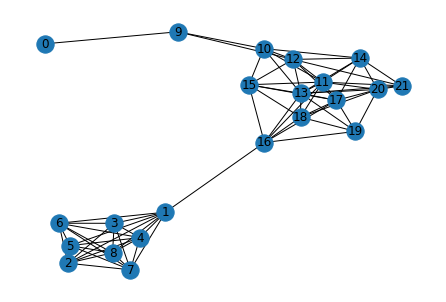

In [271]:
G = nx.Graph()
for x in neighbour_dict:
    for neighbour in neighbour_dict[x]:
        G.add_edge(x,neighbour[0],weight=neighbour[1])

nx.draw(G,with_labels = True)


In [273]:
while(True):

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [230]:
print(math.factorial(22))

1124000727777607680000
